### Weekly assignment week 41
Bjørnstad, Johannessen, and Merlid

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from data_gen import DataGen, Poly1D2Deg
from grad_desc import Model
from plotting import Plotting 

In [2]:
data = Poly1D2Deg(1000)

In [3]:
def tune_eta(model_type: str = "OLS", tpe: str = "Constant", batch_size: int = 0, epochs: int = 10000) -> float:
    
    etas = [0.01, 0.05]#, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.1]
    best_eta = etas[0]
    best_loss = 1e5

    for e in etas:
        model = Model(data, model_type = model_type)
        model.gradient_descent(eta = e, tpe = tpe, batch_size = batch_size, epochs = epochs) 
        loss = model.MSE_list[-1]
        if loss < best_loss:
            best_loss = loss
            best_eta = e

    #print(f"Best eta: {best_eta}, Best loss: {best_loss}")
    return best_eta, best_loss

In [4]:
model_types = ["OLS", "Ridge"]
tpe = ["Constant", "Momentum", "Adagrad", "Adam", "RMSprop"]
batch_sizes = [100, 1000]
epochs = 100


for model_type in model_types:
    
    best_params_model = {}

    best_loss_model = 1e5
    best_tpe_model = ""
    best_batch_size_model = 0
    best_eta_model = 0

    for t in tpe:
        best_params_tpe = {}
        best_loss = 1e5
        best_tpe = ""
        best_batch_size = 0
        best_eta = 0

        for batch_size in batch_sizes:
            best_eta, loss = tune_eta(model_type = model_type, tpe = t, batch_size = batch_size, epochs = epochs)
            if loss < best_loss:
                best_loss = loss
                best_tpe = t
                best_batch_size = batch_size
                best_eta = best_eta

        best_params_tpe["eta"] = best_eta
        best_params_tpe["loss"] = best_loss
        best_params_tpe["batch_size"] = best_batch_size

        if best_loss < best_loss_model:
            best_loss_model = best_loss
            best_tpe_model = best_tpe
            best_batch_size_model = best_batch_size
            best_eta_model = best_eta

        best_params_model[best_tpe] = best_params_tpe

    print(f"Model: {model_type}")
    



Model: OLS
Model: Ridge


In [5]:
print(best_params_model)

{'Constant': {'eta': 0.05, 'loss': 0.49129825741321737, 'batch_size': 1000}, 'Momentum': {'eta': 0.05, 'loss': 0.41764104175175054, 'batch_size': 1000}, 'Adagrad': {'eta': 0.05, 'loss': 0.43128135581444516, 'batch_size': 1000}, 'Adam': {'eta': 0.05, 'loss': 0.29906507197116455, 'batch_size': 1000}, 'RMSprop': {'eta': 0.05, 'loss': 0.3854904667278447, 'batch_size': 1000}}


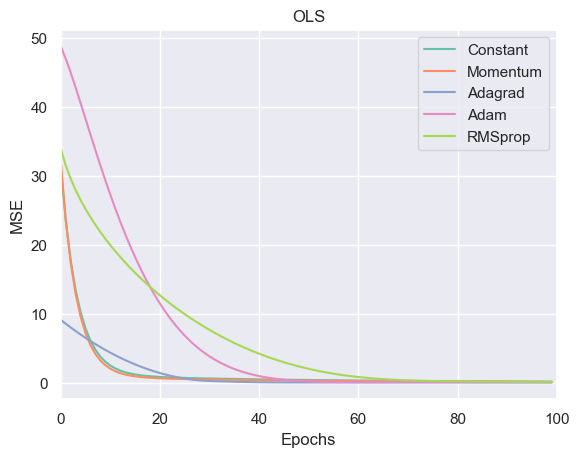

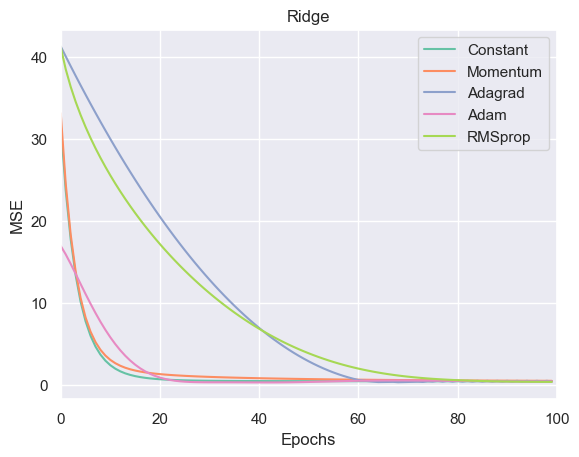

In [6]:
# plot for the best: 

for model_type in model_types:
    for t in tpe: 
        model = Model(data, model_type = model_type)
        model.gradient_descent(eta = best_params_model[t]["eta"], tpe = t, batch_size = best_params_model[t]["batch_size"], epochs = epochs)

        plots = Plotting(model)
        plots.plot_loss(xlim=100, label = t)
        plt.title(f"{model_type}")
    plt.show()